In [1]:
#xyzファイルのインポート
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

with open("C:/Users/kozo/Documents/PYTHON/Least_squares/jupyter_notebook/ati_1_1_out-Cloud.xyz", "r") as inf:
    iary = inf.readlines()

N = len(iary)
xyz = np.zeros((N, 3))

for i, ary in enumerate(iary):
    ary = ary.replace("\n", "")
    data = ary.split(" ")
    u, m, p = float(data[0]), float(data[1]), float(data[2])
    xyz[i] = [u, m, p]
    
#座標ごとの配列に転置
x, y, z = xyz.T

#座標ごとの最大値、最小値
ixyz = np.array([np.max(x), np.min(x), np.max(y), np.min(y), np.max(z), np.min(z)])
#座標ごとの長さ
lexyz = np.array([np.abs(ixyz[0] - ixyz[1]), np.abs(ixyz[2] - ixyz[3]), np.abs(ixyz[4] - ixyz[5])])

#yz平面データ
print("N: %d" %(N))
print("\npcd :")
print(xyz)

#グラフ描写
fig = plt.figure()
ax1 = Axes3D(fig)
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')

ax1.scatter3D(x, y, z, label="Dataset", s=0.3)
plt.show()


N: 63324

pcd :
[[-3785.57202148 -2359.83178711  -613.86199951]
 [-3713.078125   -2335.63647461  -613.91009521]
 [-3711.13012695 -2336.84838867  -614.14752197]
 ...
 [-3540.62255859 -2238.66943359  -625.94769287]
 [-3544.13623047 -2234.37744141  -623.00097656]
 [-3545.47070313 -2239.26318359  -624.76580811]]


<Figure size 640x480 with 1 Axes>

In [2]:
#重心
G = np.zeros(3)
G = [np.average(x), np.average(y), np.average(z)]

print("G: (%f, %f, %f)" %(G[0], G[1], G[2]))

#各慣性モーメント
I = np.zeros(6) #ixx, iyy, izz, ixy, iyz, izx
for i in range(N):
    I[0] += (x[i] - G[0])**2
    I[1] += (y[i] - G[1])**2
    I[2] += (z[i] - G[2])**2
    I[3] += (x[i] - G[0])*(y[i] - G[1])
    I[4] += (y[i] - G[1])*(z[i] - G[2])
    I[5] += (z[i] - G[2])*(x[i] - G[0])

#慣性テンソル
A = np.zeros((3, 3))
A = [[I[0], I[3], I[5]],
     [I[3], I[1], I[4]],
     [I[5], I[4], I[2]]]

print("\n慣性テンソル:")
print(A[0])
print(A[1])
print(A[2])

#固有値Wと固有ベクトルV
W, V = np.zeros(3), np.zeros((3, 3))
W, V = np.linalg.eig(A)

print("\n固有値:")
print(W)
print("\n固有ベクトル:")
print(V)

#基準となるベクトル（固有値が最大となる固有ベクトル）
Widx = np.argmax(W)
V_std = np.array([V[Widx][0], V[Widx][1], V[Widx][2]])

print("\n基準ベクトル：")
print(V_std)

G: (-3661.302462, -2279.293348, -685.178427)

慣性テンソル:
[2990835150.038956, 910442367.1388623, 45339133.580098726]
[910442367.1388623, 317575815.09602547, 13805379.762459416]
[45339133.580098726, 13805379.762459416, 212867018.85661414]

固有値:
[3.27218556e+09 3.69594736e+07 2.12132952e+08]

固有ベクトル:
[[ 9.55522833e-01  2.94558928e-01 -1.45311013e-02]
 [ 2.94510067e-01 -9.55632873e-01 -5.44358632e-03]
 [ 1.54898550e-02 -9.21915408e-04  9.99879600e-01]]

基準ベクトル：
[ 0.95552283  0.29455893 -0.0145311 ]


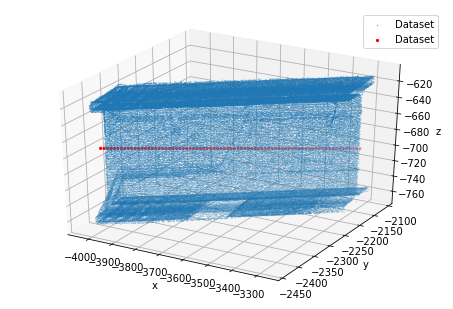

In [3]:
#直線の方程式：x/a = y/b = z/c　を用いる

#法線ベクトルを直線に拡張（点群として）
if np.argmax(lexyz) == 0:
    DN = lexyz[0]
    d = np.arange(int(ixyz[1]), int(ixyz[0]), 10)
    #print(d)
    st_pcd = np.zeros((len(d), 3))
    
    for i in range(len(d)):
        st_pcd[i] = [d[i], (d[i] - G[0])*V_std[1]/V_std[0] + G[1], (d[i] - G[0])*V_std[2]/V_std[0] + G[2]]
        
#省略    
elif np.argmax(lexyz) == 1:
    print("同様")
elif np.argmax(lexyz) == 2:
    print("同様")

st_pcdt = st_pcd.T
#print(st_pcdt)

#グラフ描写
fig = plt.figure()
ax1 = Axes3D(fig)
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')

ax1.scatter3D(x, y, z, label="Dataset", s=0.1)
ax1.scatter3D(st_pcdt[0], st_pcdt[1], st_pcdt[2], label="Dataset", s=5, color='red')
plt.legend()
plt.show()   

分割数: 20

重心：
[[-4016.07114138 -2389.4789609   -680.11787936]
 [-3983.86031619 -2378.69024957  -690.67159407]
 [-3943.15535111 -2366.27825184  -689.45606191]
 [-3902.87841723 -2354.04602211  -689.19951965]
 [-3863.13726886 -2341.2507405   -690.27914492]
 [-3823.07688854 -2329.24468314  -689.17305876]
 [-3783.15457009 -2317.15231585  -690.11000819]
 [-3753.6526578  -2307.86807981  -686.19676609]
 [-3712.95985268 -2294.83790066  -677.12271426]
 [-3673.01356687 -2282.84200172  -676.8450832 ]
 [-3632.44306361 -2269.93315779  -682.85893921]
 [-3592.95580768 -2258.08763903  -686.46192593]
 [-3553.01819941 -2245.58258503  -686.77831065]
 [-3523.05058052 -2236.38168568  -687.05105722]
 [-3483.07734225 -2224.34586207  -688.02161036]
 [-3442.91805185 -2212.12349679  -686.90607284]
 [-3403.1919895  -2199.69066838  -684.19644261]
 [-3362.75363938 -2187.97544668  -677.82580609]
 [-3322.70185866 -2176.13105658  -674.99108721]
 [-3289.54509111 -2163.16100549  -676.12077403]]


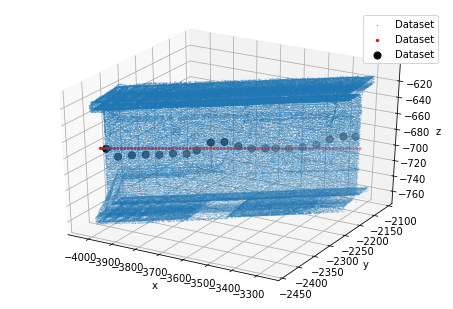

In [4]:
#輪切りにした時の各点群の重心Gnを求める

#分割数
n = 20
print("分割数: %d" %(n))

Gn = np.zeros((n, 3))

for i in range(n):
    xo, yo, zo =  st_pcd[int(len(d)*(i + 1)/n - len(d)/(2*n))]
    #ddは各平面までの最大距離の二乗
    dd = (st_pcd[int(len(d)*i/n)][0] - xo)**2 + (st_pcd[int(len(d)*i/n)][1] - yo)**2 + (st_pcd[int(len(d)*i/n)][2] - zo)**2
    nn = 0 #検出した点の数(初期化)
    
    #dd > (axo + byo + czo + d)^2 / a^2 + b^2 + c^2 を満たす点(xo, yo, zo)を検出する
    for j in range(N):
        ddi = (V_std[0]*x[j] + V_std[1]*y[j] + V_std[2]*z[j] - (V_std[0]*xo + V_std[1]*yo + V_std[2]*zo))**2 / (V_std[0]**2 + V_std[1]**2 + V_std[2]**2)
        
        if dd > ddi:
            Gn[i] += [x[j], y[j], z[j]]
            nn += 1
            
    Gn[i] /= nn

print("\n重心：")
print(Gn)

#グラフ表示
GnT = Gn.T
fig = plt.figure()
ax1 = Axes3D(fig)
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')

ax1.scatter3D(x, y, z, label="Dataset", s=0.1)
ax1.scatter3D(st_pcdt[0], st_pcdt[1], st_pcdt[2], label="Dataset", s=5, color='red')
ax1.scatter3D(GnT[0], GnT[1], GnT[2], label="Dataset", s=50, color='black')
plt.legend()
plt.show()